# Exploratory Data Analysis - Data

4 types of data are provided: 

1. Ticket Sales Data - sales data from the tickets purchased and scanned at the United Center
2. Email Engagement Data - these contain information about interactions attendees have with the emails sent before and after the game. 
    * KBYG - know before you go emails are the pre-game emails
    * Postgame - postgame emails sent after the game
3. LiveA Demographic Data - 3rd Party Provider data to augment with ticket sales and email engagment data to profile individuals with demographic characteristics
4. Bulls Theme + Giveaway Schedule - schedule of promotional activity for each game. 

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

## Ticket Sales

### Ticket Sales Data Overview

This data represents tickets redeemed at the United Center for Chicago Bulls home games. Column names have been renamed to be more code-friendly. Below is the data dictionary:

### Event Information
| Code Friendly Name        | Description                                                  | Detail                                         | Field Type |
|---------------------------|--------------------------------------------------------------|------------------------------------------------|------------|
| season_name               | Indicates the NBA season of each event                       | NBA season runs from October to April          | CHARACTER  |
| event_date                | The date of the game for which tickets were redeemed         |                                                | DATE       |
| event_weekday             | The day of the week each game was held                       |                                                | CHARACTER  |
| opponent_short            | The nickname of the opposing team (city/location excluded)   | Example: Lakers, Pelicans                      | CHARACTER  |

### Ticket Purchase Information
| Code Friendly Name        | Description                                                  | Detail                                         | Field Type |
|---------------------------|--------------------------------------------------------------|------------------------------------------------|------------|
| parent_ticket_categories  | Type of ticket purchased                                     | Group = group purchases, Individual: Resale Buyer, Package = Subscription | CHARACTER  |
| add_date                  | Date the tickets were purchased/added                        |                                                | DATE       |
| days_before_event         | Days in advance the ticket was purchased                     | Calculated from Add Date and Event Date        | INTEGER    |
| purchaser_email           | Email contact associated with the purchase record            |                                                | CHARACTER  |
| total_seats               | Total number of seats purchased in the transaction           |                                                | INTEGER    |
| seat_location             | Location in the United Center where the seats are located    | 100 Level = lower bowl of seats                 | CHARACTER  |
| seat_level                | Level of seat access within the United Center                | Lower Level = 100 Level, Club Level = 200 and 300 levels | CHARACTER  |

### Attendance Information
| Code Friendly Name        | Description                                                  | Detail                                         | Field Type |
|---------------------------|--------------------------------------------------------------|------------------------------------------------|------------|
| arrival_time              | DateTime of ticket scan at the gate                          | Blank = Un-scanned ticket                      | DATETIME   |
| attendee_email            | Email contact associated with the attendee                   |                                                | CHARACTER  |
| attendee_zip_code         | Zip code of the attendee's address                           |                                                | INTEGER    |
| mobile_scan               | Indicates if the ticket was scanned using a mobile device    | 1 = Mobile scan, 0 = Non-mobile scan, Blank = Un-scanned | BINARY     |
| scan_category             | Method used by the attendee to access the event              |                                                | CHARACTER  |

This dictionary serves as a reference for understanding and utilizing the data fields related to ticket sales for Chicago Bulls home games at the United Center.


In [2]:
# Load data from CSV file
df_tickets = pd.read_csv("/Users/jm/dev/acl_spring_24_bulls2/data/raw/Ticket Sales Data/22-23 & 23-24 (through 3.14) Ticket Sales Data.csv", 
                      names = [
                        'season_name', 'event_date', 'event_weekday', 'opponent_short',
                        'parent_ticket_categories', 'add_date', 'days_before_event',
                        'purchaser_email', 'total_seats', 'seat_location', 'seat_level',
                        'arrival_time', 'attendee_email', 'attendee_zip_code', 'mobile_scan',
                        'scan_category'
                    ],
                    header = 0
                )


The data needs to be adjusted to reflect the data types specified in the data dictionary. 

In [3]:
# Fix Date Data Types
df_tickets["event_date"] = pd.to_datetime(df_tickets['event_date'], format = "%d-%b-%y")
df_tickets["add_date"] = pd.to_datetime(df_tickets['add_date'], format = "%d-%b-%y")
df_tickets["arrival_time"] = pd.to_datetime(df_tickets['arrival_time'], format = "%m/%d/%y %H:%M")

# Convert mobile_scan to a boolean
df_tickets['mobile_scan'] = df_tickets.mobile_scan.astype("bool")

Filter to just the season ticket holders using the 'parent_ticket_categories' variable.

In [4]:
df_season = df_tickets[df_tickets['parent_ticket_categories'] == "Season"]

In [5]:
df_season.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270086 entries, 300179 to 570264
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   season_name               270086 non-null  object        
 1   event_date                270086 non-null  datetime64[ns]
 2   event_weekday             270086 non-null  object        
 3   opponent_short            270086 non-null  object        
 4   parent_ticket_categories  270086 non-null  object        
 5   add_date                  270086 non-null  datetime64[ns]
 6   days_before_event         270086 non-null  int64         
 7   purchaser_email           268908 non-null  object        
 8   total_seats               270086 non-null  int64         
 9   seat_location             270086 non-null  object        
 10  seat_level                270086 non-null  object        
 11  arrival_time              237206 non-null  datetime64[ns]
 12  at

In [6]:
df_season.describe()

,event_date,add_date,days_before_event,total_seats,arrival_time
count,270086,270086,270086.000000,270086.000000,237206
mean,2023-05-30 20:20:41.311286016,2022-09-15 19:45:03.112341760,257.024748,1.991147,2023-06-01 06:09:33.202279424
min,2022-10-04 00:00:00,2022-01-28 00:00:00,-61.000000,1.000000,2022-10-04 18:36:00
25%,2022-12-28 00:00:00,2022-01-28 00:00:00,177.000000,1.000000,2022-12-30 17:31:00
50%,2023-03-17 00:00:00,2022-08-17 00:00:00,269.000000,2.000000,2023-03-17 18:38:00
75%,2023-12-02 00:00:00,2023-02-01 00:00:00,336.000000,2.000000,2023-12-02 18:47:00
max,2024-03-14 00:00:00,2024-03-14 00:00:00,436.000000,14.000000,2024-03-14 20:52:00
std,NaN,NaN,101.241811,0.899302,NaN


In [7]:
df_season.describe(include=['O'])

,season_name,event_weekday,opponent_short,parent_ticket_categories,purchaser_email,seat_location,seat_level,attendee_email,attendee_zip_code,scan_category
count,270086,270086,270086,270086,268908,270086,270086,236956,201700,270086
unique,2,7,29,1,3891,6,5,116211,14895,5
top,2022-2023 Chicago Bulls,Wed,Bucks,Season,michaelsblechman@gmail.com,100 Level Center,Lower Level,michaelsblechman@gmail.com,60614,Web Browser
freq,159078,58950,16972,270086,527,77916,122890,279,4939,146121


### Ticket Sales Data Summary

There are 270,068 season ticket purchasers that were scanned at Chicago Bulls games at the United Center over the 2022-2023 season and 2023-2024 (through March 19th) season. The data contains 15 columns. 

There are missing values in the `purchaser_email`, `attendee_email`, `arrival_time`, and `attendee_zip_code` columns.



## Email Engagement Data

The email engagment data is broken into two files corresponding to the pre-game and post-game email schedule. One email is sent before every Chicago Bulls game and another is sent after every game. The data collected in both of these files represents the clickthrough data for both types of email sent. Both files contain data for both the '22 - '23 season and '23 - '24 season. 

Everytime an attendee clicks a link on one of these emails a row is entered. 

The two types of email engagment data are: 
1. KBYG - Know Before You Go: these emails are sent before the game to ticket holders with pre-game instructions. Usually sent the same day. 
2. Post-Game: These emails are sent after the game with promotional material. 


### Email - Data Dictionary

We will rename the columns to make them more code friendly. Find the data dictionary below. 

| Variable Name                 | Code Friendly Name    | Description                                                   | Detail                | Field Type |
|-------------------------------|-----------------------|---------------------------------------------------------------|-----------------------|------------|
| Email Address                 | attendee_email        | email of the attendee of the game                             |                       | CHARACTER  |
| Clickthrough Link             | clickthrough_url      | clickthrough link/URL                                         |                       | CHARACTER  |
| Email Clickthrough Date/Time  | clickthrough_dt       | clickthrough date and time                                    |                       | DATE       |
| Email Name                    | email_name            | name of the email sent out                                    |                       | CHARACTER  |
| Total Clickthroughs           | total_clickthroughs   | total count of click throughs                                 |                       | INTEGER    |
| Email Send Date               | email_send_dt         | date and time the email was sent                              |                       | DATE       |
| Unique Clickthroughs          | unique_clickthroughs  | the number of unique clickthroughs                            |                       | INTEGER    |
| Clickthrough Link Count       | clickthrough_link_count  | ????                                                       |                       | INTEGER    |
| Season                        | season                | the season                                                    |                       | CHARACTER  |
|                               | email_type            | the type of email: kbyg or post                               |                       | CHARACTER  |

Since both data sets follow the same data structure we will concatenate the datasets. We have also added in a column to denote which type of email is sent. 

In [8]:
# Load data from CSV file
#Email Address,  Clickthrough Link,  Email Clickthrough Date/Time,  Email Name,Total Clickthroughs,Email Send Date,Unique Clickthroughs,Clickthrough Link Count,Season

df_kbyg = pd.read_csv("/Users/jm/dev/acl_spring_24_bulls2/data/raw/Email Engagement Data/KBYG Clickthrough Data_2223 and 2324 Seasons.csv"
                 , 
                      names = [
                        'attendee_email', 'clickthrough_url', 'clickthrough_dt',
                        'email_name', 'total_clickthroughs', 'email_send_dt',
                        'unique_clickthroughs', 'clickthrough_link_count', 'season'
                    ],
                    header = 0
                )
df_kbyg['email_type'] = 'kbyg'

df_post = pd.read_csv("/Users/jm/dev/acl_spring_24_bulls2/data/raw/Email Engagement Data/Postgame Email Clickthrough_2223 and 2324 seasons.csv"
                 , 
                      names = [
                        'attendee_email', 'clickthrough_url', 'clickthrough_dt',
                        'email_name', 'total_clickthroughs', 'email_send_dt',
                        'unique_clickthroughs', 'clickthrough_link_count', 'season'
                    ],
                    header = 0
                )
df_post['email_type'] = 'post'

df_emails = pd.concat([df_kbyg, df_post])


In [9]:
# Fix Date Data Types
df_emails["clickthrough_dt"] = pd.to_datetime(df_emails['clickthrough_dt'], format = "%m/%d/%Y %H:%M")
df_emails["email_send_dt"] = pd.to_datetime(df_emails['email_send_dt'], format = "%m/%d/%Y %H:%M")

In [10]:
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37613 entries, 0 to 23382
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   attendee_email           37613 non-null  object        
 1   clickthrough_url         37613 non-null  object        
 2   clickthrough_dt          37613 non-null  datetime64[ns]
 3   email_name               37613 non-null  object        
 4   total_clickthroughs      37613 non-null  int64         
 5   email_send_dt            37613 non-null  datetime64[ns]
 6   unique_clickthroughs     37613 non-null  int64         
 7   clickthrough_link_count  37613 non-null  int64         
 8   season                   37613 non-null  int64         
 9   email_type               37613 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 3.2+ MB


In [11]:
df_emails.describe()

,clickthrough_dt,total_clickthroughs,email_send_dt,unique_clickthroughs,clickthrough_link_count,season
count,37613,37613.000000,37613,37613.0,37613.000000,37613.000000
mean,2023-07-09 01:27:44.730811392,1.000239,2023-07-08 09:45:42.328450304,1.0,1.000239,2272.918645
min,2022-10-22 16:13:00,1.000000,2022-10-22 16:00:00,1.0,1.000000,2223.000000
25%,2023-01-14 15:22:00,1.000000,2023-01-14 14:00:00,1.0,1.000000,2223.000000
50%,2023-04-10 16:38:00,1.000000,2023-04-10 13:00:00,1.0,1.000000,2223.000000
75%,2023-12-31 13:07:00,1.000000,2023-12-30 16:00:00,1.0,1.000000,2324.000000
max,2024-03-20 12:16:00,2.000000,2024-03-19 12:00:00,1.0,2.000000,2324.000000
std,NaN,0.015467,NaN,0.0,0.015467,50.497325


In [12]:
df_emails.describe(include=['O'])

,attendee_email,clickthrough_url,email_name,email_type
count,37613,37613,37613,37613
unique,25295,47,120,2
top,lzerante@corpconc.com,https://bulls.qualtrics.com/jfe/form/SV_cNsSkl...,2023_CB_Marketing_Surveys_PostGame,post
freq,95,10731,11399,23383


Now we have to filter for just those emails that correspond to season ticket holders from the tickets data. 

In [13]:
df_season_emails = df_emails[df_emails['attendee_email'].isin(df_season['attendee_email'].unique())]

In [14]:
df_season_emails.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8158 entries, 1 to 23372
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   attendee_email           8158 non-null   object        
 1   clickthrough_url         8158 non-null   object        
 2   clickthrough_dt          8158 non-null   datetime64[ns]
 3   email_name               8158 non-null   object        
 4   total_clickthroughs      8158 non-null   int64         
 5   email_send_dt            8158 non-null   datetime64[ns]
 6   unique_clickthroughs     8158 non-null   int64         
 7   clickthrough_link_count  8158 non-null   int64         
 8   season                   8158 non-null   int64         
 9   email_type               8158 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 701.1+ KB


In [15]:
df_season_emails.describe()

,clickthrough_dt,total_clickthroughs,email_send_dt,unique_clickthroughs,clickthrough_link_count,season
count,8158,8158.000000,8158,8158.0,8158.000000,8158.000000
mean,2023-06-25 18:07:12.378033920,1.000490,2023-06-25 01:19:15.724442368,1.0,1.000490,2270.305835
min,2022-10-22 16:13:00,1.000000,2022-10-22 16:00:00,1.0,1.000000,2223.000000
25%,2023-01-01 10:40:30,1.000000,2022-12-31 14:00:00,1.0,1.000000,2223.000000
50%,2023-04-02 17:54:30,1.000000,2023-04-02 12:00:00,1.0,1.000000,2223.000000
75%,2024-01-01 14:05:30,1.000000,2023-12-31 13:00:00,1.0,1.000000,2324.000000
max,2024-03-20 03:23:00,2.000000,2024-03-19 12:00:00,1.0,2.000000,2324.000000
std,NaN,0.022139,NaN,0.0,0.022139,50.401971


In [16]:
df_season_emails.describe(include=['O'])

,attendee_email,clickthrough_url,email_name,email_type
count,8158,8158,8158,8158
unique,4776,46,119,2
top,mephgrave@bacardi.com,https://bulls.qualtrics.com/jfe/form/SV_cNsSkl...,2023_CB_Marketing_Surveys_PostGame,kbyg
freq,44,1570,1282,5143


Below is a histogram of the frequency of link clicks by user. The vast majority of season ticketholder attendees are clicking only once. 

<Axes: >

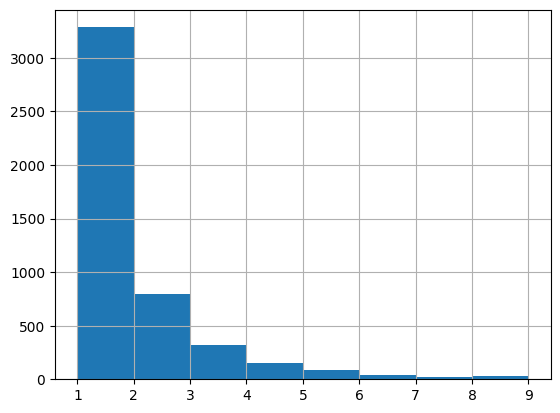

In [25]:
df_season_emails.groupby("attendee_email").count()['season'].hist(bins = range(1,10))

In [42]:
df_season_emails.groupby("email_name").count()['season'].reset_index()

,email_name,season
0,2022_1022_CB_Ticketing_01_Pregame_Cleveland_SGB,76
1,2022_1022_CB_Ticketing_02_Postgame_Cleveland_SGB,61
2,2022_1024_CB_Ticketing_01_Pregame_Boston_SGB,47
3,2022_1024_CB_Ticketing_02_Postgame_Boston_SGB,43
4,2022_1026_CB_Ticketing_01_Pregame_Indiana_SGB,65
...,...,...
114,2024_0301_CB_Digital_KBYG_MIL,21
115,2024_0311_CB_Digital_KBYG_DAL,28
116,2024_0314_CB_Digital_KBYG_LAC,54
117,2024_0316_CB_Digital_KBYG_WAS,16


In [49]:
data_sorted

,email_name,season
66,2023_0315_CB_Ticketing_02_Postgame_Sacramento_SGB,9
29,2022_1226_CB_Ticketing_02_Postgame_Houston_SGB,14
118,2024_0318_CB_Digital_KBYG_POR,15
117,2024_0316_CB_Digital_KBYG_WAS,16
58,2023_0224_CB_Ticketing_02_Postgame_Brooklyn_SGB,17
...,...,...
107,2024_0120_CB_Digital_KBYG_MEM,131
72,2023_0322_CB_Ticketing_02_Postgame_Philadelphi...,245
13,2022_1109_CB_Ticketing_02_Postgame_NewOrleans_SGB,365
103,2024_0103_CB_STH_Family_Fest-KBYG,706


Looking at the most popular emails in terms of engagement for season ticketholder attendees points to a few of the most popular emails. Unsurprisingly, the marketing survey gets the most engagement (maybe there is an incentive to complete the survey). This will help us look into the features of the emails and the type of people responding to understand any relationships that would be valuable to exploit. 

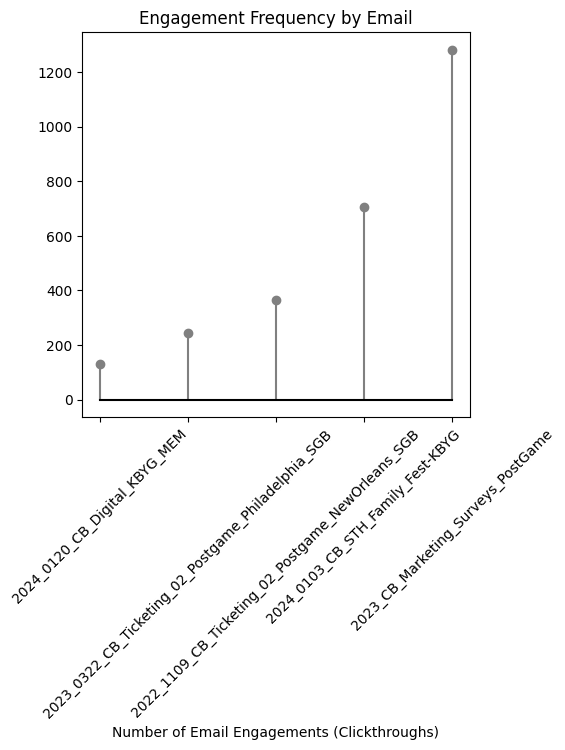

In [57]:
data_sorted = df_season_emails.groupby("email_name").count()['season'].reset_index().sort_values(by='season', ascending=True).tail(5)


plt.figure(figsize=(5, 5))
plt.stem(data_sorted['email_name'], data_sorted['season'], linefmt="grey", basefmt="black")
plt.xlabel('Number of Email Engagements (Clickthroughs)')
plt.xticks(rotation=45)  # Rotates labels to 45 degrees, use 90 for vertical labels
plt.title('Engagement Frequency by Email')
plt.show()

### Email Engagement Data Summary

There are 8,158 email clickthroughs by season ticket holder game attendees. This is a drop off from the 37K total email interactions. There are no nulls. The `unique_clickthroughs` columns is useless since all values indicate a clickthrough event occured and therefore is always equal to 1. 


In [17]:
print("Percentage of attendees that are season ticket holders: ", len(df_season['attendee_email'].unique())/len(df_tickets['attendee_email'].unique())*100, '%')
print("Percentage of email clickthroughs (engagement) made by season ticket holders: ", len(df_season_emails['attendee_email'].unique())/len(df_emails['attendee_email'].unique())*100, '%')

Percentage of attendees that are season ticket holders:  37.113257198334225 %
Percentage of email clickthroughs (engagement) made by season ticket holders:  18.881201818541214 %


**Interesting Fact**

While season ticket holders make up 37% of all gameday scans, they only make up 18.8% of the email engagement either before or after the game. This may point to an opportunity to increase season ticket holder engagement since they seem to engage less than their fair share. 

The response variable we intend to use will be based on this data. We will be looking for clusters in our data and hope to see stronger correlations with higher propensities to engage with the emails in those target customers. 

## Live Analytics Data 

The Live Anlaytics contains demographic data for ticketholder attendees. 

See the data dictionary for relevant information. 

In [27]:
df_liva23 = pd.read_csv("/Users/jm/dev/acl_spring_24_bulls2/data/raw/LiveA Demographic Data/22-23 LiveA (Season Ticketholder Attendees).csv")

df_liva24 = pd.read_csv("/Users/jm/dev/acl_spring_24_bulls2/data/raw/LiveA Demographic Data/23-24 LiveA (Season Ticketholder Attendees).csv")

/var/folders/3q/d621fwvs43q2f6s93g46njd00000gn/T/ipykernel_93321/3471165704.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_liva24 = pd.read_csv("/Users/jm/dev/acl_spring_24_bulls2/data/raw/LiveA Demographic Data/23-24 LiveA (Season Ticketholder Attendees).csv")


In [28]:
print(df_liva23.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76884 entries, 0 to 76883
Columns: 253 entries, ult_party_id to vehicle_type
dtypes: float64(217), int64(1), object(35)
memory usage: 148.4+ MB
None


In [29]:
df_liva23.describe()

,ult_party_id,acct_id,age_two_yr_incr_input_indv,age_two_yr_incr_1st_indv,age_two_yr_incr_2nd_indv,race_cd,adult_hh_num,hh_male_18_24_ind,hh_female_18_24_ind,hh_unk_18_24_ind,...,propn_score_minor_499,client_event_cnt,client_tkt,client_sp,client_pe_tkt_cnt,client_pe_sp,client_tkt_price,client_tkt_price_max,client_tkt_price_min,client_walkup_buyer_ind
count,5.528800e+04,7.688400e+04,48803.000000,49936.000000,24328.000000,0.0,52362.000000,2720.0,2582.0,132.0,...,57505.000000,55575.000000,55575.000000,55575.000000,24954.000000,25261.000000,24954.000000,24954.000000,24954.000000,0.0
mean,5.221303e+08,2.382599e+07,41.809704,45.213373,49.783295,NaN,1.925748,1.0,1.0,1.0,...,508.406486,0.936824,2.417256,360.540082,2.574754,366.636250,148.390474,177.148323,126.229601,NaN
std,5.934971e+08,8.032407e+06,13.966835,13.630294,15.246266,NaN,0.964341,0.0,0.0,0.0,...,177.416817,2.187956,9.741104,1571.368671,1.292205,433.674626,152.124717,205.705139,142.751814,NaN
min,4.693330e+07,1.000120e+05,18.000000,18.000000,18.000000,NaN,1.000000,1.0,1.0,1.0,...,64.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000,5.000000,4.250000,NaN
25%,8.229506e+07,2.071969e+07,30.000000,34.000000,40.000000,NaN,1.000000,1.0,1.0,1.0,...,378.000000,0.000000,0.000000,0.000000,2.000000,156.500000,69.172500,76.000000,50.400000,NaN
50%,1.911863e+08,2.797470e+07,40.000000,44.000000,50.000000,NaN,2.000000,1.0,1.0,1.0,...,508.000000,0.000000,0.000000,0.000000,2.000000,258.720000,110.000000,129.000000,90.000000,NaN
75%,1.040008e+09,2.967570e+07,50.000000,54.000000,60.000000,NaN,2.000000,1.0,1.0,1.0,...,636.000000,1.000000,2.000000,327.840000,3.000000,428.000000,179.000000,204.000000,150.000000,NaN
max,1.746297e+09,3.125330e+07,99.000000,99.000000,99.000000,NaN,6.000000,1.0,1.0,1.0,...,985.000000,115.000000,1231.000000,155742.680000,34.400000,19188.640000,3500.000000,6720.000000,3500.000000,NaN


In [35]:
#Check if all columns are the same in both data sets
sum(df_liva23.columns.isin(df_liva24.columns)) == 253

True